<a href="https://colab.research.google.com/github/iciromaco/RadiShLab/blob/master/%E7%8F%BE%E7%94%BB%E5%83%8F%E3%81%8B%E3%82%89%E3%82%B7%E3%83%AB%E3%82%A8%E3%83%83%E3%83%88%E7%94%BB%E5%83%8F%E3%81%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Google ドライブに接続
次のセルを実行し、表示されたリンク先にアクセスし、接続を許可します。表示されたコードを枠内にペーストしてEnterすると、左のエリアに drive というフォルダが現れます。

このフォルダ内の My Drive は自分の Google Drive そのものです。



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# フォルダ内の画像の収集

In [0]:
# フォルダのパス
DATAFOLDER = '/content/drive/My Drive/RadishLab/RDSamples'

In [77]:
# ファイル名の確認
!ls /content/drive/My\ Drive/RadishLab/RDSamples

17daruma5o03_l.jpg  17horyot2o07_l.jpg	17nezumi2o02_l.jpg  RDSamplesTHUM.PNG
17heians1o04_l.jpg  17karami1o09_l.jpg	17ofukur1o07_l.jpg  Sample001.ipynb
17horyot1o06_l.jpg  17makoto2o06_l.jpg	17tukasa1o02_l.jpg


In [0]:
# 指定フォルダ内の画像の収集
from glob import glob
import os
from PIL import Image
# 画像パスの収集
def collectimagepaths(path, exts=['jpg','jpge','png']):
    allfiles = glob(path+'/*')
    imgfiles = []
    for x in allfiles:
        if os.path.splitext(x)[-1][1:] in imgexts:
            imgfiles.append(x)
    return imgfiles

# 画像の収集
def collectimages(path, exts=['jpg','jpge','png']):
    imgfiles = collectimagepaths(path, exts)
    imgs = [cv2.imread(afile,-1) for afile in imgfiles]
    return imgs

# サムネイルの作成
def makethumbnail(path, exts=['jpg','jpge','png']):
    imgfiles = collectimagepaths(path, exts)
    i = 0
    sam = Image.new('RGB', (500,100*((len(imgfiles)+4)//5)),(0,0,0))
    row = col = 0
    for rad in imgfiles:
        img = Image.open(rad, 'r')
        img.thumbnail((100, 100))
        sam.paste(img,(col,row))
        col += 100
        if col == 500:
            col = 0
            row += 100
    dirname = os.path.splitext(os.path.basename(path))[0]
    sam.save('{}THUM.PNG'.format(dirname), 'PNG')
    return sam

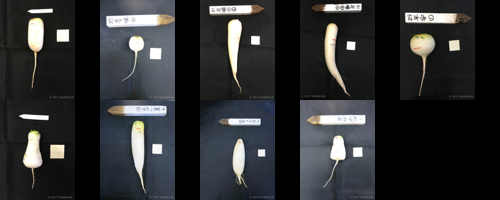

In [76]:
makethumbnail(DATAFOLDER)

# 画像の表示

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# プロット用関数
def plotimg(img,layout="111"):
    if len(img.shape) == 2:
        pltgry(img,layout)
    elif len(img.shape) ==3:
        pltcol(img,layout)

def pltgry(img,layout="111"):
    plt.subplot(layout)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_GRAY2RGB))

def pltcol(img,layout="111"):
    plt.subplot(layout)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    
def mkparaimage(img1,img2):
    h1,w1 = img1.shape[:2]
    h2,w2 = img2.shape[:2]
    if img1.ndim == 2:
        img11 = np.zeros((h1,w1,3))
        img11[:,:,0] = img11[:,:,1]=img11[:,:,2]=img1
    else:
        img11=img1
    if img2.ndim == 2:
        img22 = np.zeros((h2,w2,3))
        img22[:,:,0]=img22[:,:,1]=img22[:,:,2]=img2
    else:
        img22=img2
    paraimg = 255*np.ones((max(h1,h2),w1+w2+10,3),dtype=np.uint8)
    
    paraimg[0:h1,0:w1,:] = img11
    paraimg[0:h2,w1+10:,:]=img22
    
    return paraimg

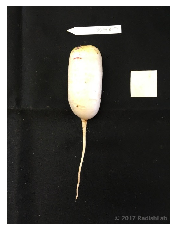

In [93]:
imgs = collectimages(DATAFOLDER)
plotimg(imgs[0])

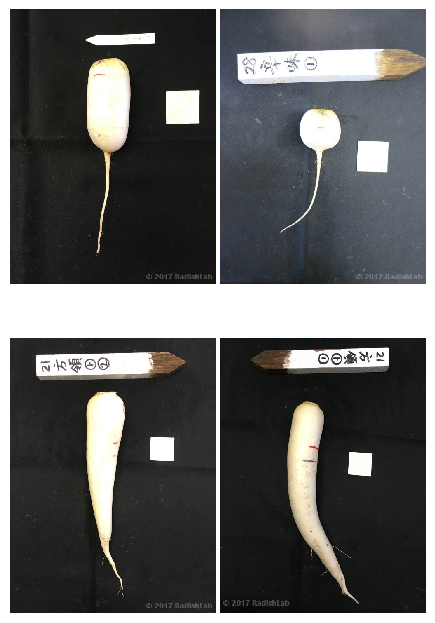

In [115]:
plt.figure(figsize=(6,8),dpi=100) # 横6x100,縦8x100のサイズを指定
plotimg(mkparaimage(imgs[0],imgs[1]), layout=211) # 2行1列配置の1個目
plotimg(mkparaimage(imgs[2],imgs[3]), layout=212) # 2行1列配置の2個目